In [1]:
# Basic data analysis and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set plot style
sns.set(style="whitegrid")

In [2]:
# Load the CSV file
df = pd.read_csv('high_diamond_ranked_10min.csv')

# Display the first 5 rows
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [3]:
# Get basic info
df.info()

# Summary stats
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


In [4]:
# Check for missing data
df.isnull().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

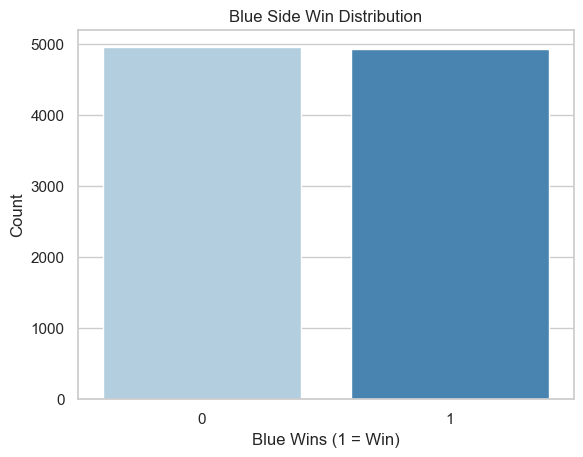

In [12]:
# Check the distribution of the target (blue side win or not)
sns.countplot(data=df, x='blueWins',palette='Blues')
plt.title("Blue Side Win Distribution")
plt.xlabel("Blue Wins (1 = Win)")
plt.ylabel("Count")
plt.show()

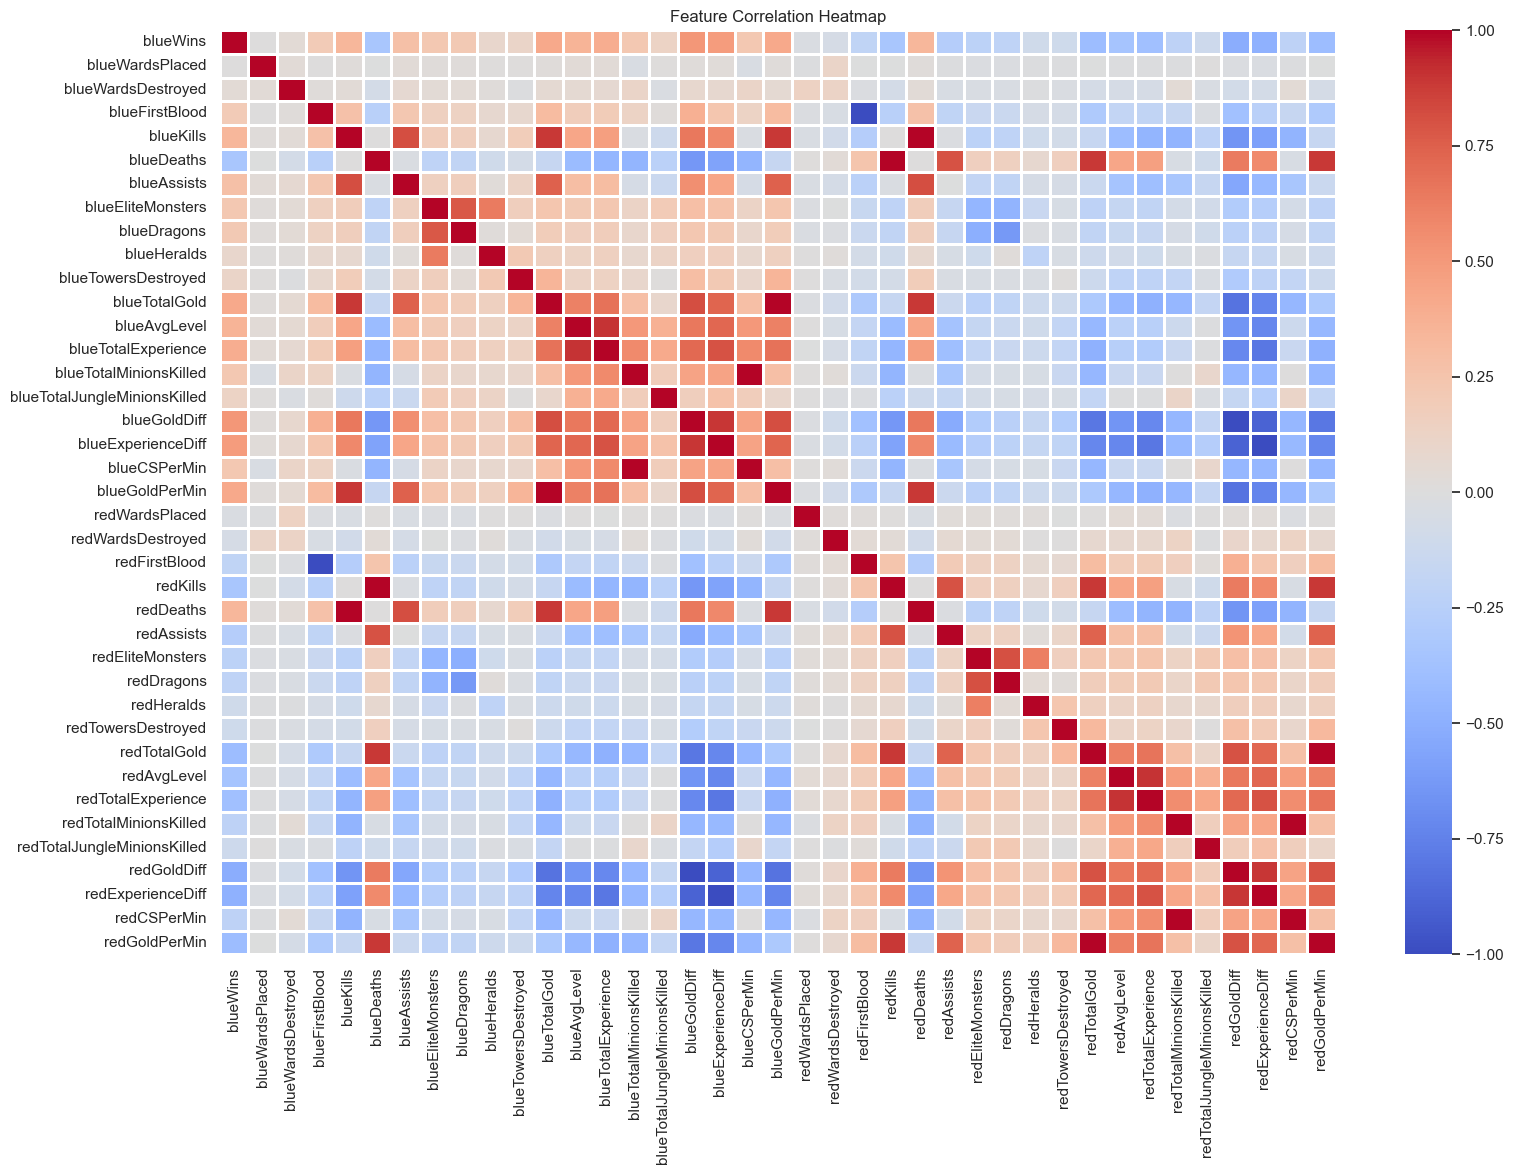

In [13]:
# Correlation matrix
plt.figure(figsize=(18, 12))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, linewidths= 1 )
plt.title("Feature Correlation Heatmap")
plt.show()

In [7]:
# Drop target leakage or non-informative columns (like gameId)
df = df.drop(['gameId'], axis=1)

# Define X and y
X = df.drop('blueWins', axis=1)
y = df['blueWins']

In [8]:
# Split the data into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
# Fit Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.7171052631578947

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.73      0.72       990
           1       0.72      0.70      0.71       986

    accuracy                           0.72      1976
   macro avg       0.72      0.72      0.72      1976
weighted avg       0.72      0.72      0.72      1976



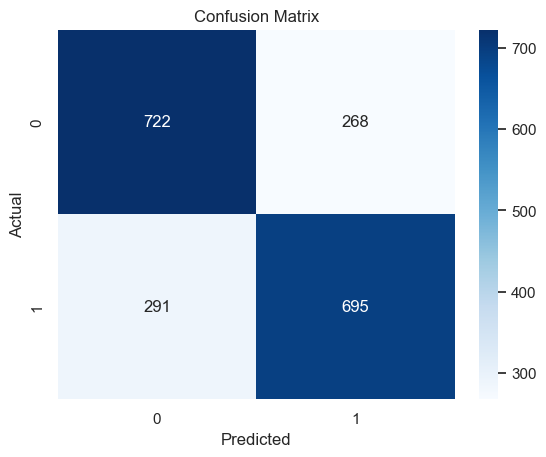

In [10]:
# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

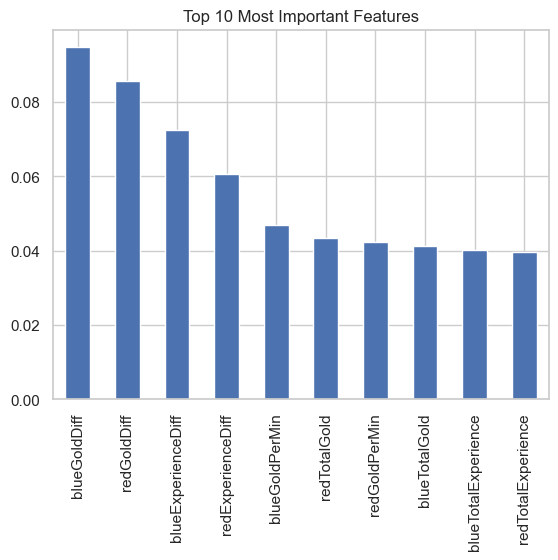

In [11]:
# Get feature importances from the model
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Most Important Features")
plt.show()

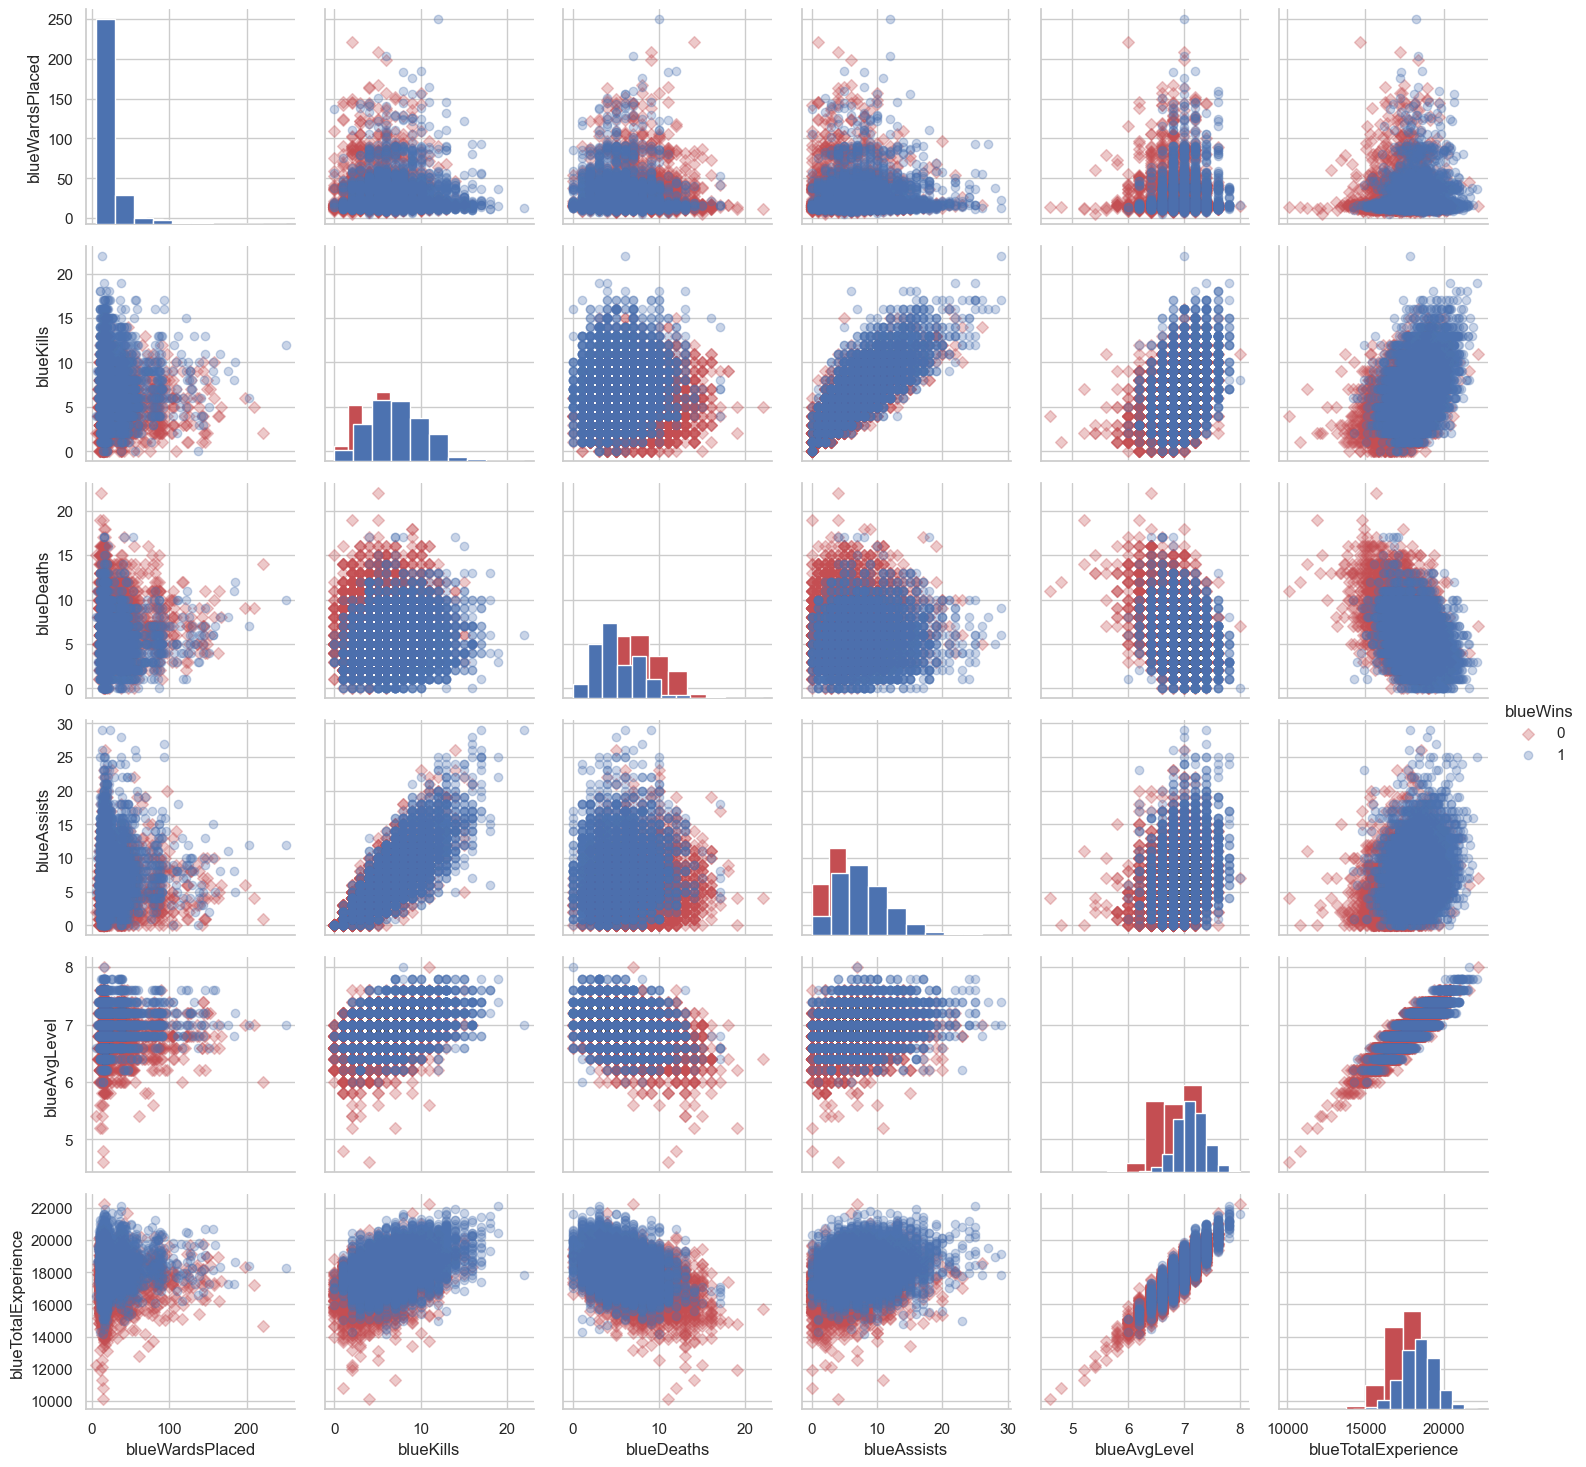

In [14]:
g = sns.PairGrid(data = df, vars=['blueWardsPlaced', 'blueKills', 'blueDeaths', 'blueAssists', 'blueAvgLevel', 'blueTotalExperience'], hue='blueWins', palette=sns.color_palette(['r', 'b']), hue_kws={"marker": ["D", "o"], "alpha": [0.3, 0.3]})
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show()

In [16]:
dfw = df.corr()['blueWins'].drop(['blueWins', 'blueDeaths'])
dfw = dfw.sort_values(ascending=False)

In [17]:
dfw.apply(lambda x: round(round(20/dfw.max()*x)/2, 1))

blueGoldDiff                    10.0
blueExperienceDiff               9.5
blueTotalGold                    8.0
blueGoldPerMin                   8.0
blueTotalExperience              8.0
blueAvgLevel                     7.0
redDeaths                        6.5
blueKills                        6.5
blueAssists                      5.5
blueCSPerMin                     4.5
blueTotalMinionsKilled           4.5
blueEliteMonsters                4.5
blueDragons                      4.0
blueFirstBlood                   4.0
blueTotalJungleMinionsKilled     2.5
blueTowersDestroyed              2.5
blueHeralds                      2.0
blueWardsDestroyed               1.0
blueWardsPlaced                  0.0
redWardsPlaced                  -0.5
redWardsDestroyed               -1.0
redHeralds                      -2.0
redTowersDestroyed              -2.0
redTotalJungleMinionsKilled     -2.0
redFirstBlood                   -4.0
redDragons                      -4.0
redCSPerMin                     -4.0
r

## 🏁 Conclusion
So, what actually helps you win a game?

Looking at the data from the perspective of the blue team, here’s what stands out:

Farming gold is the most important factor — even more important than getting kills.

Leveling up has a bigger impact than kills.

Wards (placing or destroying) don’t influence the outcome much.

First blood matters — it’s just one kill, but it's tied to better chances of winning.

Assists are just as valuable as kills, so chasing last hits isn’t necessary.

Jungling, towers, and Rift Heralds aren’t that crucial for winning.

📝 Summary
The key to winning seems pretty simple:
Stick to lane farming to collect gold and level up fast. Focus on team fights — don’t stress about getting the kill credit. Don’t over-prioritize jungling, towers, or vision control. Use your time and gold where it counts: leveling and building up your advantage in lane.